In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [4]:
h1n1_data = pd.read_csv('C:/Users/Jayant/Downloads/h1n1_vaccine_prediction.csv')

In [5]:
print(h1n1_data.head())

   unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0  

In [6]:
print(h1n1_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
print(h1n1_data.isnull().sum())

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [8]:
# Create a label encoder object
le = LabelEncoder()

# Encode the categorical columns
categorical_cols = ['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa']
for col in categorical_cols:
    h1n1_data[col] = le.fit_transform(h1n1_data[col])

In [9]:
print(h1n1_data.head())

   unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0  

In [10]:
print(h1n1_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [11]:
print(h1n1_data.isnull().sum())

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

In [12]:
print(h1n1_data.describe())

          unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count  26707.000000  26615.000000    26591.000000          26636.000000   
mean   13353.000000      1.618486        1.262532              0.048844   
std     7709.791156      0.910311        0.618149              0.215545   
min        0.000000      0.000000        0.000000              0.000000   
25%     6676.500000      1.000000        1.000000              0.000000   
50%    13353.000000      2.000000        1.000000              0.000000   
75%    20029.500000      2.000000        2.000000              0.000000   
max    26706.000000      3.000000        2.000000              1.000000   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
count       26499.000000      26688.000000           26665.000000   
mean            0.725612          0.068982               0.825614   
std             0.446214          0.253429               0.379448   
min             0.000000          0.000000      

In [18]:
h1n1_data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                    0
race                             0
sex                              0
income_level                     0
marital_status                   0
housing_status      

<AxesSubplot:>

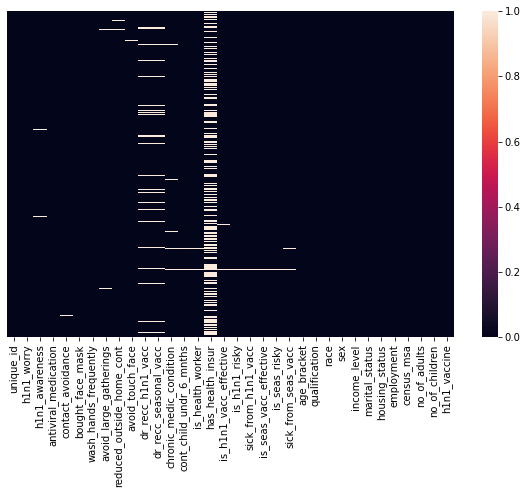

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(h1n1_data.isnull(),yticklabels=False)

In [22]:
nan_counts = {
    "unique_id": 0,
    "h1n1_worry": 92,
    "h1n1_awareness": 116,
    "antiviral_medication": 71,
    "contact_avoidance": 208,
    "bought_face_mask": 19,
    "wash_hands_frequently": 42,
    "avoid_large_gatherings": 87,
    "reduced_outside_home_cont": 82,
    "avoid_touch_face": 128,
    "dr_recc_h1n1_vacc": 2160,
    "dr_recc_seasonal_vacc": 2160,
    "chronic_medic_condition": 971,
    "cont_child_undr_6_mnths": 820,
    "is_health_worker": 804,
    "has_health_insur": 12274,
    "is_h1n1_vacc_effective": 391,
    "is_h1n1_risky": 388,
    "sick_from_h1n1_vacc": 395,
    "is_seas_vacc_effective": 462,
    "is_seas_risky": 514,
    "sick_from_seas_vacc": 537,
    "age_bracket": 0,
    "qualification": 0,
    "race": 0,
    "sex": 0,
    "income_level": 0,
    "marital_status": 0,
    "housing_status": 0,
    "employment": 0,
    "census_msa": 0,
    "no_of_adults": 249,
    "no_of_children": 249,
    "h1n1_vaccine": 0
}

# Fill NaN values with the mode for columns with more than 0 NaNs
for column, na_count in nan_counts.items():
    if na_count > 0:
        h1n1_data[column].fillna(h1n1_data[column].mode()[0], inplace=True)

# Display the first few rows to verify
print(h1n1_data.head())

   unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0  

In [23]:
h1n1_data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<AxesSubplot:>

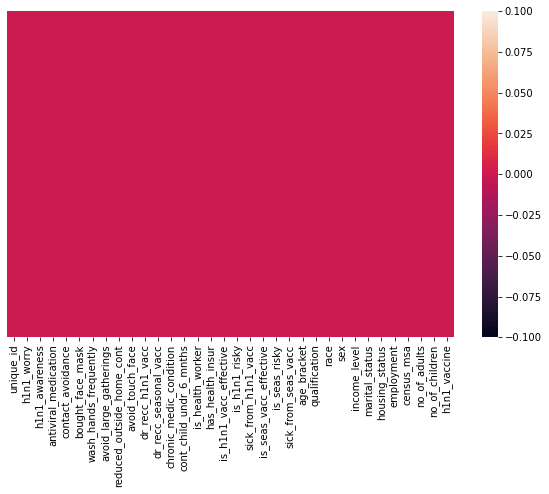

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(h1n1_data.isnull(),yticklabels=False)

In [25]:
X = h1n1_data.drop('h1n1_vaccine', axis=1)
y = h1n1_data['h1n1_vaccine']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model=LogisticRegression(solver="liblinear")

In [28]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [29]:
model.score(X_train,y_train)

0.79265153288088

In [30]:
model.score(X_test,y_test)

0.7916510670160989

In [31]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
dtree.score(X_train,y_train)

1.0

In [33]:
dtree.score(X_test,y_test)

0.7620741295394983

In [34]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

0.8259302597706529


In [35]:
y_predict = dTreeR.predict(X_test)

In [36]:
print(dTreeR.score(X_test, y_test))

0.8311493822538375


<AxesSubplot:>

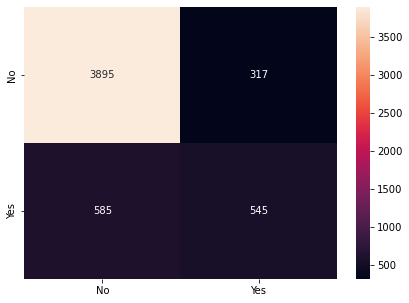

In [37]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [38]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.8287158367652565


<AxesSubplot:>

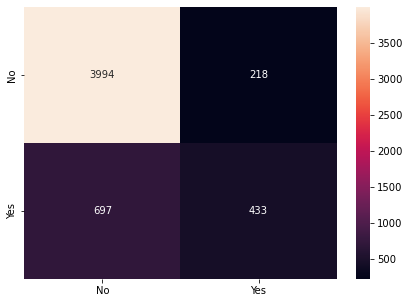

In [39]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [40]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.8388244103332085


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.8405091725945338


<AxesSubplot:>

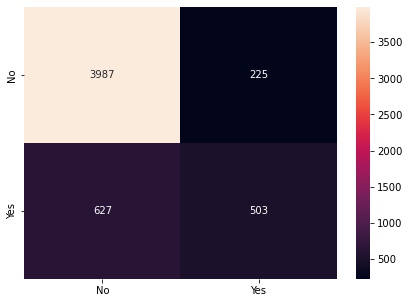

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)

0.8390116061400225


<AxesSubplot:>

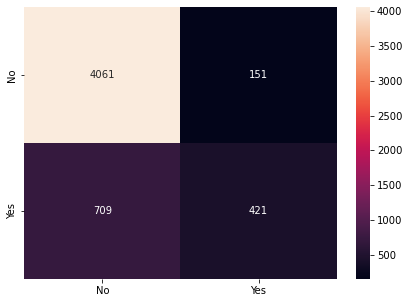

In [44]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [45]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,...,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04,2.670700e+04
mean,-1.205877e-16,3.376380e-15,4.955036e-16,-2.250107e-16,1.070465e-15,-1.826865e-15,-2.722069e-15,6.178372e-16,-5.165632e-16,1.849695e-15,...,5.055886e-16,-2.878154e-16,1.786783e-16,-4.642426e-16,-5.559720e-16,-3.861566e-16,-1.023480e-15,3.728436e-16,3.692021e-16,1.449039e-15
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.731986e+00,-1.781960e+00,-2.044279e+00,-2.262927e-01,-1.634957e+00,-2.720971e-01,-2.177944e+00,-7.458901e-01,-7.117983e-01,-1.453764e+00,...,-1.556348e+00,-2.784094e+00,-8.271240e-01,-8.566326e-01,-9.170715e-01,-6.024625e-01,-8.058883e-01,-1.012379e+00,-1.183463e+00,-5.723870e-01
25%,-8.659930e-01,-6.818488e-01,-4.236260e-01,-2.262927e-01,-1.634957e+00,-2.720971e-01,4.591486e-01,-7.458901e-01,-7.117983e-01,-1.453764e+00,...,-7.134759e-01,4.654419e-01,-8.271240e-01,-8.566326e-01,-9.170715e-01,-6.024625e-01,-8.058883e-01,-1.012379e+00,-1.183463e+00,-5.723870e-01
50%,0.000000e+00,4.182621e-01,-4.236260e-01,-2.262927e-01,6.116368e-01,-2.720971e-01,4.591486e-01,-7.458901e-01,-7.117983e-01,6.878696e-01,...,1.293958e-01,4.654419e-01,-8.271240e-01,4.149824e-02,-9.170715e-01,-6.024625e-01,-8.058883e-01,2.022483e-01,1.499300e-01,-5.723870e-01
75%,8.659930e-01,4.182621e-01,1.197027e+00,-2.262927e-01,6.116368e-01,-2.720971e-01,4.591486e-01,1.340680e+00,1.404892e+00,6.878696e-01,...,9.722676e-01,4.654419e-01,1.209008e+00,9.396291e-01,7.650870e-01,1.004445e+00,4.221648e-01,1.416875e+00,1.499300e-01,5.084062e-01
max,1.731986e+00,1.518373e+00,1.197027e+00,4.419056e+00,6.116368e-01,3.675158e+00,4.591486e-01,1.340680e+00,1.404892e+00,6.878696e-01,...,1.815139e+00,4.654419e-01,1.209008e+00,1.837760e+00,2.447246e+00,2.611353e+00,2.878271e+00,1.416875e+00,2.816717e+00,2.669993e+00


In [46]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' ,metric='euclidean')

In [47]:
NNH.fit(XScaled, y)

KNeighborsClassifier(metric='euclidean', weights='distance')